In [10]:
def read_avg_latency(file_path):
    with open(file_path, "r") as f:
        content = f.readlines()
    avg_latency_line = content[0]
    avg_latency = avg_latency_line.split("Avg latency: ")[1].split(" seconds")[0]
    
    return float(avg_latency)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def draw(x, y, xlabel, ylabel, title):

    # Example data (replace with your own)
    # Model size (e.g., millions of parameters)
    x = np.array(x)

    # Latency (e.g., milliseconds)
    y = np.array(y)

    # Fit linear regression (1st degree polynomial)
    coefficients = np.polyfit(x, y, 1)
    regression_line = np.poly1d(coefficients)

    # Generate x values for smooth regression line
    x_fit = np.linspace(x.min(), x.max(), 100)
    y_fit = regression_line(x_fit)

    # Plot
    plt.figure()
    plt.scatter(x, y)
    plt.plot(x_fit, y_fit)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.show()


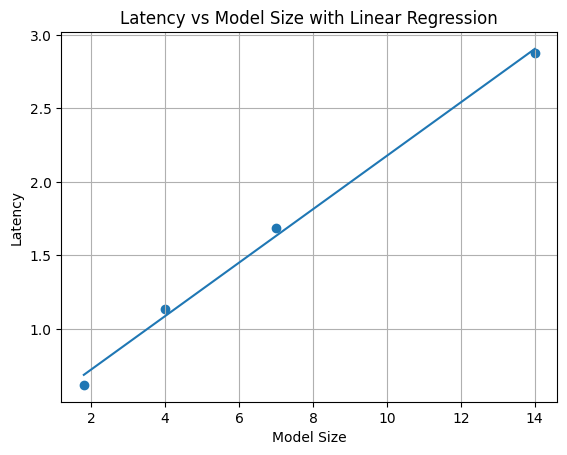

In [15]:
import os 

baseline_dir = "./logs/baseline"
latencies = []
model_sizes = []
for file in os.listdir(baseline_dir):
    file_path = os.path.join(baseline_dir, file)
    avg_latency = read_avg_latency(file_path)
    latencies.append(avg_latency)
    
    model_size = float(file.split(".log")[0].split("-")[1][:-1])
    model_sizes.append(model_size)
    
draw(model_sizes, latencies, "Model Size", "Latency", "Latency vs Model Size with Linear Regression")

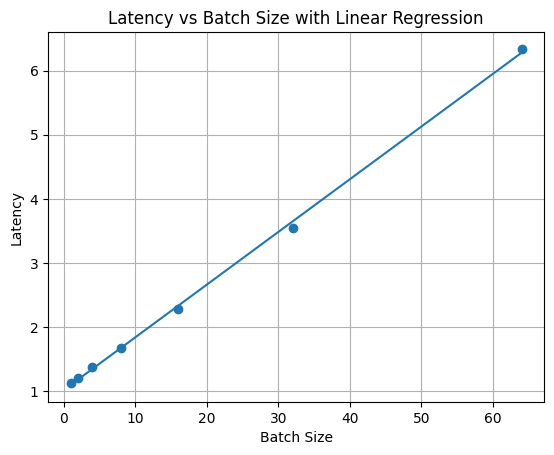

In [19]:
import os 

batch_size_dir = "./logs/batch_size"
latencies = []
batch_sizes = []
for file in os.listdir(batch_size_dir):
    file_path = os.path.join(batch_size_dir, file)
    avg_latency = read_avg_latency(file_path)
    latencies.append(avg_latency)
    
    batch_size = float(file.split(".log")[0])
    batch_sizes.append(batch_size)
    
draw(batch_sizes, latencies, "Batch Size", "Latency", "Latency vs Batch Size with Linear Regression")

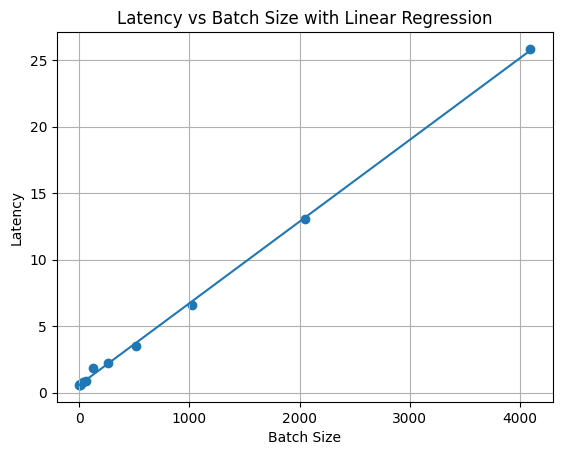

: 

In [ ]:
import os 

batch_size_exp_path = "./logs/batch_size/exp2.log"
latencies = []
batch_sizes = []
with open(batch_size_exp_path, "r") as f:
    content = f.readlines()
for line in content[-13:]:
    batch_size = float(line.split("Batch ")[1].split(":")[0])
    latency = float(line.split("mean=")[1].split("s")[0])
    
    batch_sizes.append(batch_size)
    latencies.append(latency)
    
    
draw(batch_sizes, latencies, "Batch Size", "Latency", "Latency vs Batch Size with Linear Regression")